In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv("flight_data_train.csv")
pd.set_option("display.max_columns",None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.shape

(10683, 11)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 25m      1
28h 30m      1
33h 45m      1
31h 50m      1
37h 10m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
# changing date colummn type into datetime 
train_data["Journey_Day"]=pd.to_datetime(train_data['Date_of_Journey']).dt.day
train_data["Journey_Month"]=pd.to_datetime(train_data['Date_of_Journey']).dt.month
train_data["Journey_year"]=pd.to_datetime(train_data['Date_of_Journey']).dt.year
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [10]:
train_data['Journey_year'].value_counts()

2019    10682
Name: Journey_year, dtype: int64

In [11]:
train_data.drop(['Date_of_Journey','Journey_year'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [12]:
#similarly I am splitting other Time columns
# Extracting Hours from Dep_Time
train_data["Dep_hour"]=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data["Dep_min"]=pd.to_datetime(train_data['Dep_Time']).dt.minute
# Extracting Hours from Arrival_Time
train_data["Arrival_hour"]=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data["Arrival_min"]=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [13]:
train_data.drop(['Dep_Time',"Arrival_Time"],axis=1,inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Handling Categorical Data

In [15]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Figure size 864x864 with 0 Axes>

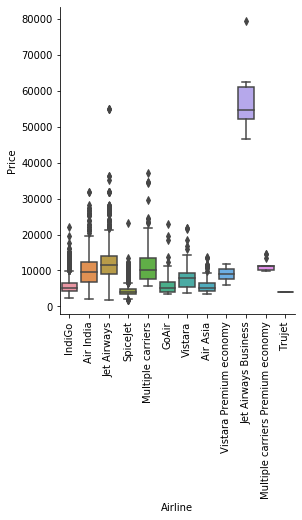

In [16]:
plt.figure(figsize=(12,12))
sns.catplot(x='Airline',y="Price",data=train_data,kind="box")
plt.xticks(rotation=90)
plt.show()

In [17]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [18]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 864x864 with 0 Axes>

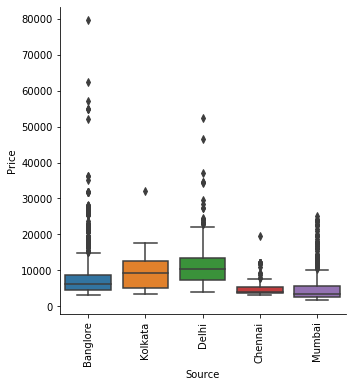

In [19]:
plt.figure(figsize=(12,12))
sns.catplot(x='Source',y="Price",data=train_data,kind="box")
plt.xticks(rotation=90)
plt.show()

In [20]:
Source=train_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [21]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 864x864 with 0 Axes>

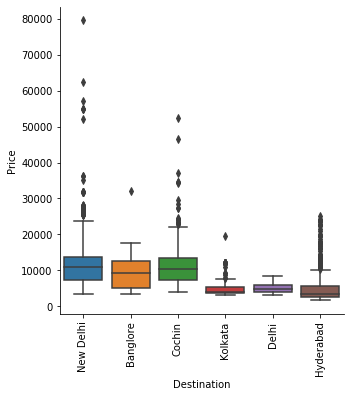

In [22]:
plt.figure(figsize=(12,12))
sns.catplot(x='Destination',y="Price",data=train_data,kind="box")
plt.xticks(rotation=90)
plt.show()

In [23]:
Destination=train_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [24]:
# Since Addition_Info contains almost no_info
# Route and Total_Stops are related to each other 
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
train_data['Duration']=lb.fit_transform(train_data['Duration'])

<Figure size 864x864 with 0 Axes>

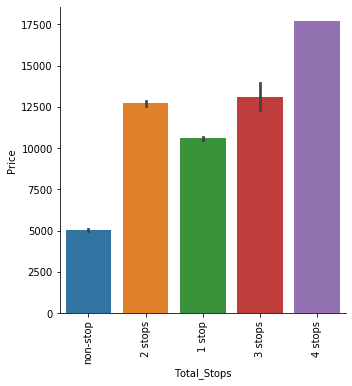

In [26]:
plt.figure(figsize=(12,12))
sns.catplot(x='Total_Stops',y="Price",data=train_data,kind="bar")
plt.xticks(rotation=90)
plt.show()

In [27]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,240,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,336,2,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,106,2,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,311,1,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,303,1,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,236,0,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,237,0,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,280,0,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,238,0,12648,3,1,11,30,14,10


In [28]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,240,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,336,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,106,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,311,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,303,1 stop,13302,3,1,16,50,21,35


In [29]:
# Concatenate dataframe ---> train_data + Airline + Source + Destination
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)
data_train.drop(["Airline","Source","Destination","Total_Stops"],axis=1,inplace=True)
data_train.head()

,Duration,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,240,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,336,7662,5,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,106,13882,6,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,311,6218,5,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,303,13302,3,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
data_train['price']=data_train['Price']
data_train.drop('Price',axis=1,inplace=True)

In [31]:
data_train.head()

,Duration,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,price
0,240,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,336,5,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662
2,106,6,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882
3,311,5,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218
4,303,3,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


# Test Data

In [32]:
test_data=pd.read_csv("flight_data_test.csv")
pd.set_option("display.max_columns",None)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [33]:
test_data.shape

(2671, 10)

In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [35]:
test_data['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
19h 45m      1
32h 5m       1
13h 35m      1
33h 45m      1
29h 55m      1
Name: Duration, Length: 320, dtype: int64

In [36]:
test_data.dropna(inplace=True)

In [37]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [38]:
# changing date colummn type into datetime 
test_data["Journey_Day"]=pd.to_datetime(test_data['Date_of_Journey']).dt.day
test_data["Journey_Month"]=pd.to_datetime(test_data['Date_of_Journey']).dt.month
test_data["Journey_year"]=pd.to_datetime(test_data['Date_of_Journey']).dt.year
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [39]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

In [40]:
test_data['Journey_year'].value_counts()

2019    2671
Name: Journey_year, dtype: int64

In [41]:
test_data.drop(['Date_of_Journey','Journey_year'],axis=1,inplace=True)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [42]:
#similarly I am splitting other Time columns
# Extracting Hours from Dep_Time
test_data["Dep_hour"]=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data['Dep_Time']).dt.minute
# Extracting Hours from Arrival_Time
test_data["Arrival_hour"]=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data["Arrival_min"]=pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [43]:
test_data.drop(['Dep_Time',"Arrival_Time"],axis=1,inplace=True)

In [44]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


 Handling Categorical Data

In [45]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [46]:
Airline=test_data[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [47]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [48]:
Source=test_data[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [49]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [50]:
Destination=test_data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [51]:
# Since Addition_Info contains almost no_info
# Route and Total_Stops are related to each other 
test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
test_data['Duration']=lb.fit_transform(test_data['Duration'])

In [53]:
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,10,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,248,1 stop,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,148,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,36,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,216,non-stop,24,6,23,55,2,45


In [54]:
test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

,Airline,Source,Destination,Duration,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,10,1,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,248,1,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,148,1,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,36,1,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,216,0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,150,1,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,213,0,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,278,1,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,60,1,3,6,4,0,19,15


In [55]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [56]:
# Concatenate dataframe ---> train_data + Airline + Source + Destination
data_test=pd.concat([test_data,Airline,Source,Destination],axis=1)
data_test.drop(["Airline","Source","Destination","Total_Stops"],axis=1,inplace=True)
data_test.head()

,Duration,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,248,5,12,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,148,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,36,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,216,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
data_test.shape

(2671, 26)

In [58]:
data_train.shape

(10682, 28)

In [59]:
#Correlation in training set
data_train.corr()

,Duration,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,price
Duration,1.000000,0.024745,-0.038860,0.041508,0.030876,0.024511,0.059971,-0.087376,0.116737,0.163614,-0.121767,0.028357,-0.068275,-0.007365,0.105357,0.007833,0.004241,0.006573,0.070560,-0.055124,-0.015501,-0.166028,-0.055124,0.185469,-0.166028,0.070560,0.007476,-0.144280
Journey_Day,0.024745,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423,-0.037279,0.002350,0.013223,-0.028387,-0.026075,0.048638,0.032978,0.030767,-0.010643,-0.015935,-0.017801,0.012202,0.112092,-0.068380,-0.013391,0.112092,0.011489,-0.013391,0.012202,-0.098370,-0.165448
Journey_Month,-0.038860,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786,-0.000281,-0.017538,-0.037203,0.057818,-0.026727,-0.002737,-0.029617,-0.032454,0.001507,0.002856,-0.012351,-0.014993,0.008017,0.063601,-0.015696,0.008017,0.008880,-0.015696,-0.014993,-0.100533,0.010705
Dep_hour,0.041508,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138,0.006799
Dep_min,0.030876,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129,-0.024458
Arrival_hour,0.024511,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366,0.024244
Arrival_min,0.059971,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271,-0.086155
Airline_Air India,-0.087376,-0.037279,-0.000281,-0.012879,-0.045688,0.088872,0.061231,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,-0.015456,-0.127510,-0.004284,-0.095939,-0.007421,-0.051068,0.001257,0.023606,0.022268,0.001257,-0.068370,0.022268,-0.051068,0.053072,0.050432
Airline_GoAir,0.116737,0.002350,-0.017538,-0.016373,0.076751,0.018526,0.096839,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,-0.004747,-0.039166,-0.001316,-0.029469,-0.002280,-0.026156,-0.009049,-0.042921,-0.035933,-0.009049,0.099863,-0.035933,-0.026156,0.017573,-0.095151
Airline_IndiGo,0.163614,0.013223,-0.037203,-0.023395,-0.014714,-0.071491,0.035124,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,-0.017026,-0.140464,-0.004720,-0.105686,-0.008175,0.141911,-0.080168,-0.057229,0.059686,-0.080168,0.090354,0.059686,0.141911,-0.018626,-0.361070


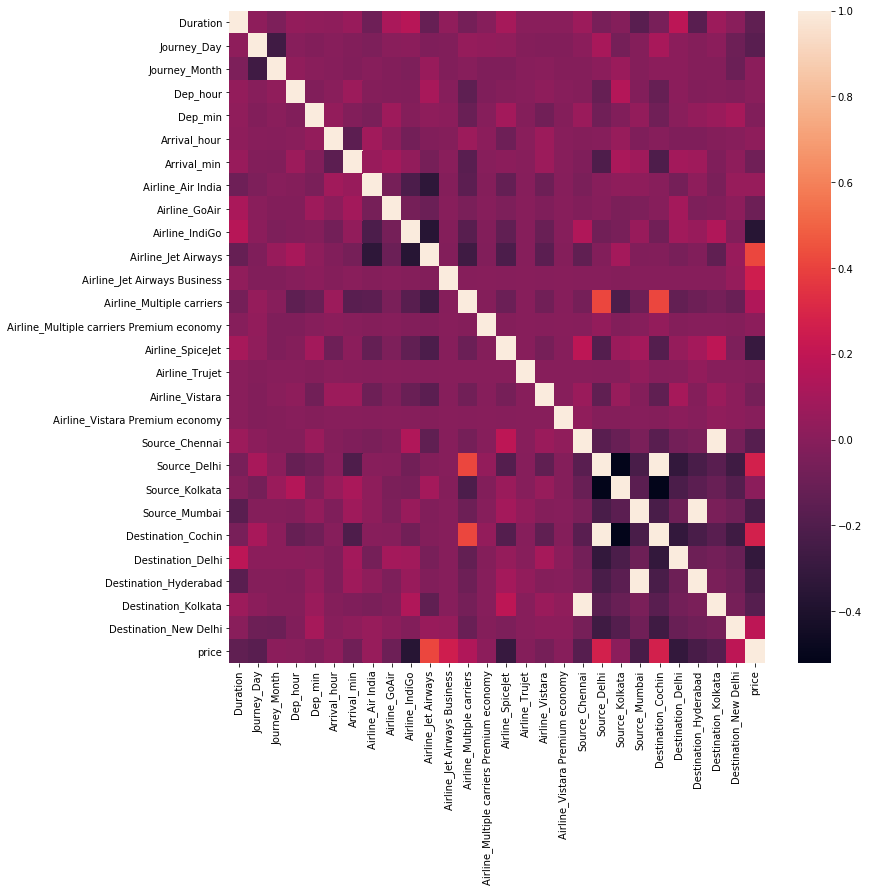

In [60]:
plt.figure(figsize=(12,12))
sns.heatmap(data_train.corr())

In [61]:
# Correlation in testing set
data_test.corr()

,Duration,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Duration,1.000000,0.009365,-0.005339,0.074146,0.030295,0.041983,0.082718,-0.087702,0.107650,0.156229,-0.109335,0.023921,-0.105857,0.016743,0.099086,0.041617,0.013134,0.073090,-0.079074,0.016079,-0.152765,-0.079074,0.204023,-0.152765,0.073090,-0.025079
Journey_Day,0.009365,1.000000,-0.258004,-0.022912,-0.025724,0.015416,-0.010006,-0.027683,0.020420,0.016032,-0.010108,-0.028858,0.012829,0.035139,0.004306,-0.011314,0.004709,0.011904,0.066892,-0.064940,-0.012886,0.066892,0.050488,-0.012886,0.011904,-0.068205
Journey_Month,-0.005339,-0.258004,1.000000,0.007080,0.001781,0.009595,-0.038251,0.020835,0.001954,-0.037015,0.008933,-0.032457,0.021331,-0.028737,-0.009786,0.010712,-0.023459,0.030135,0.020809,0.058732,-0.042521,0.020809,-0.004377,-0.042521,0.030135,-0.101735
Dep_hour,0.074146,-0.022912,0.007080,1.000000,-0.034524,0.000147,0.066751,-0.058501,-0.002410,-0.029029,0.134777,-0.002906,-0.155593,-0.013389,0.001835,0.063316,0.006724,-0.010867,-0.167791,0.166871,0.012869,-0.167791,0.031698,0.012869,-0.010867,-0.008468
Dep_min,0.030295,-0.025724,0.001781,-0.034524,1.000000,0.046824,-0.020065,-0.006465,0.070123,-0.028656,-0.010494,0.036018,-0.094086,0.014834,0.093536,-0.051337,0.028845,0.079943,-0.063457,-0.048981,0.037013,-0.063457,-0.023997,0.037013,0.079943,0.133999
Arrival_hour,0.041983,0.015416,0.009595,0.000147,0.046824,1.000000,-0.136215,0.052411,0.026607,-0.022180,-0.009336,0.015224,0.027360,-0.004376,-0.115658,0.084724,0.013280,0.006153,-0.015264,0.036062,-0.031102,-0.015264,-0.028204,-0.031102,0.006153,0.026833
Arrival_min,0.082718,-0.010006,-0.038251,0.066751,-0.020065,-0.136215,1.000000,0.078494,0.116729,0.026999,-0.059965,0.000721,-0.171740,0.017544,-0.015669,0.089228,0.004801,-0.052274,-0.233382,0.117665,0.072541,-0.233382,0.122859,0.072541,-0.052274,0.048981
Airline_Air India,-0.087702,-0.027683,0.020835,-0.058501,-0.006465,0.052411,0.078494,1.000000,-0.058788,-0.216003,-0.315788,-0.012157,-0.171602,-0.014892,-0.129055,-0.100042,-0.012157,-0.044936,-0.005340,0.025223,0.037115,-0.005340,-0.078707,0.037115,-0.044936,0.052410
Airline_GoAir,0.107650,0.020420,0.001954,-0.002410,0.070123,0.026607,0.116729,-0.058788,1.000000,-0.064387,-0.094131,-0.003624,-0.051152,-0.004439,-0.038469,-0.029821,-0.003624,-0.022501,-0.021627,-0.034054,-0.036217,-0.021627,0.084893,-0.036217,-0.022501,0.039406
Airline_IndiGo,0.156229,0.016032,-0.037015,-0.029029,-0.028656,-0.022180,0.026999,-0.216003,-0.064387,1.000000,-0.345862,-0.013314,-0.187945,-0.016310,-0.141346,-0.109570,-0.013314,0.090180,-0.044342,-0.051351,0.050168,-0.044342,0.074617,0.050168,0.090180,-0.025167


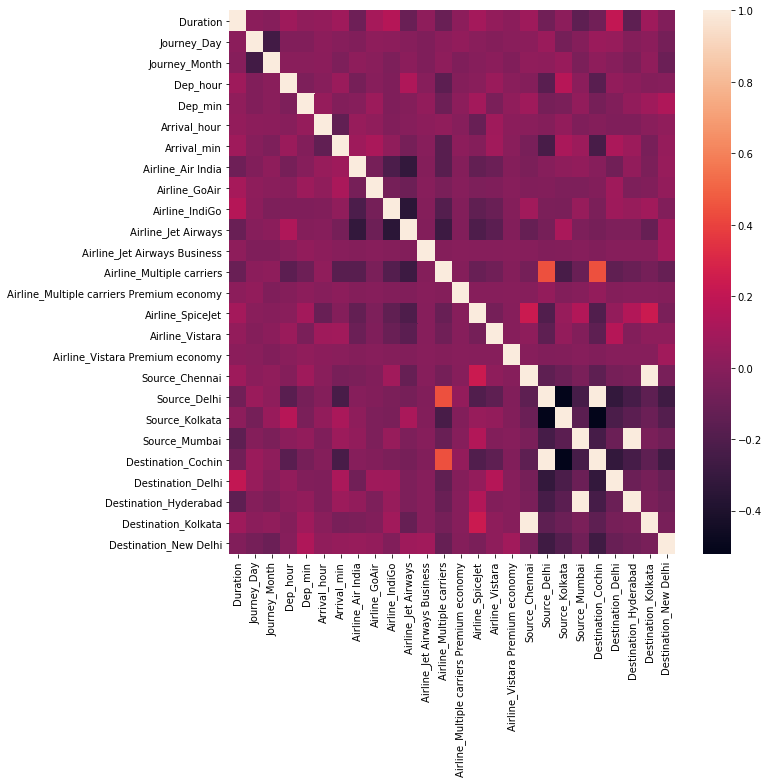

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(data_test.corr())

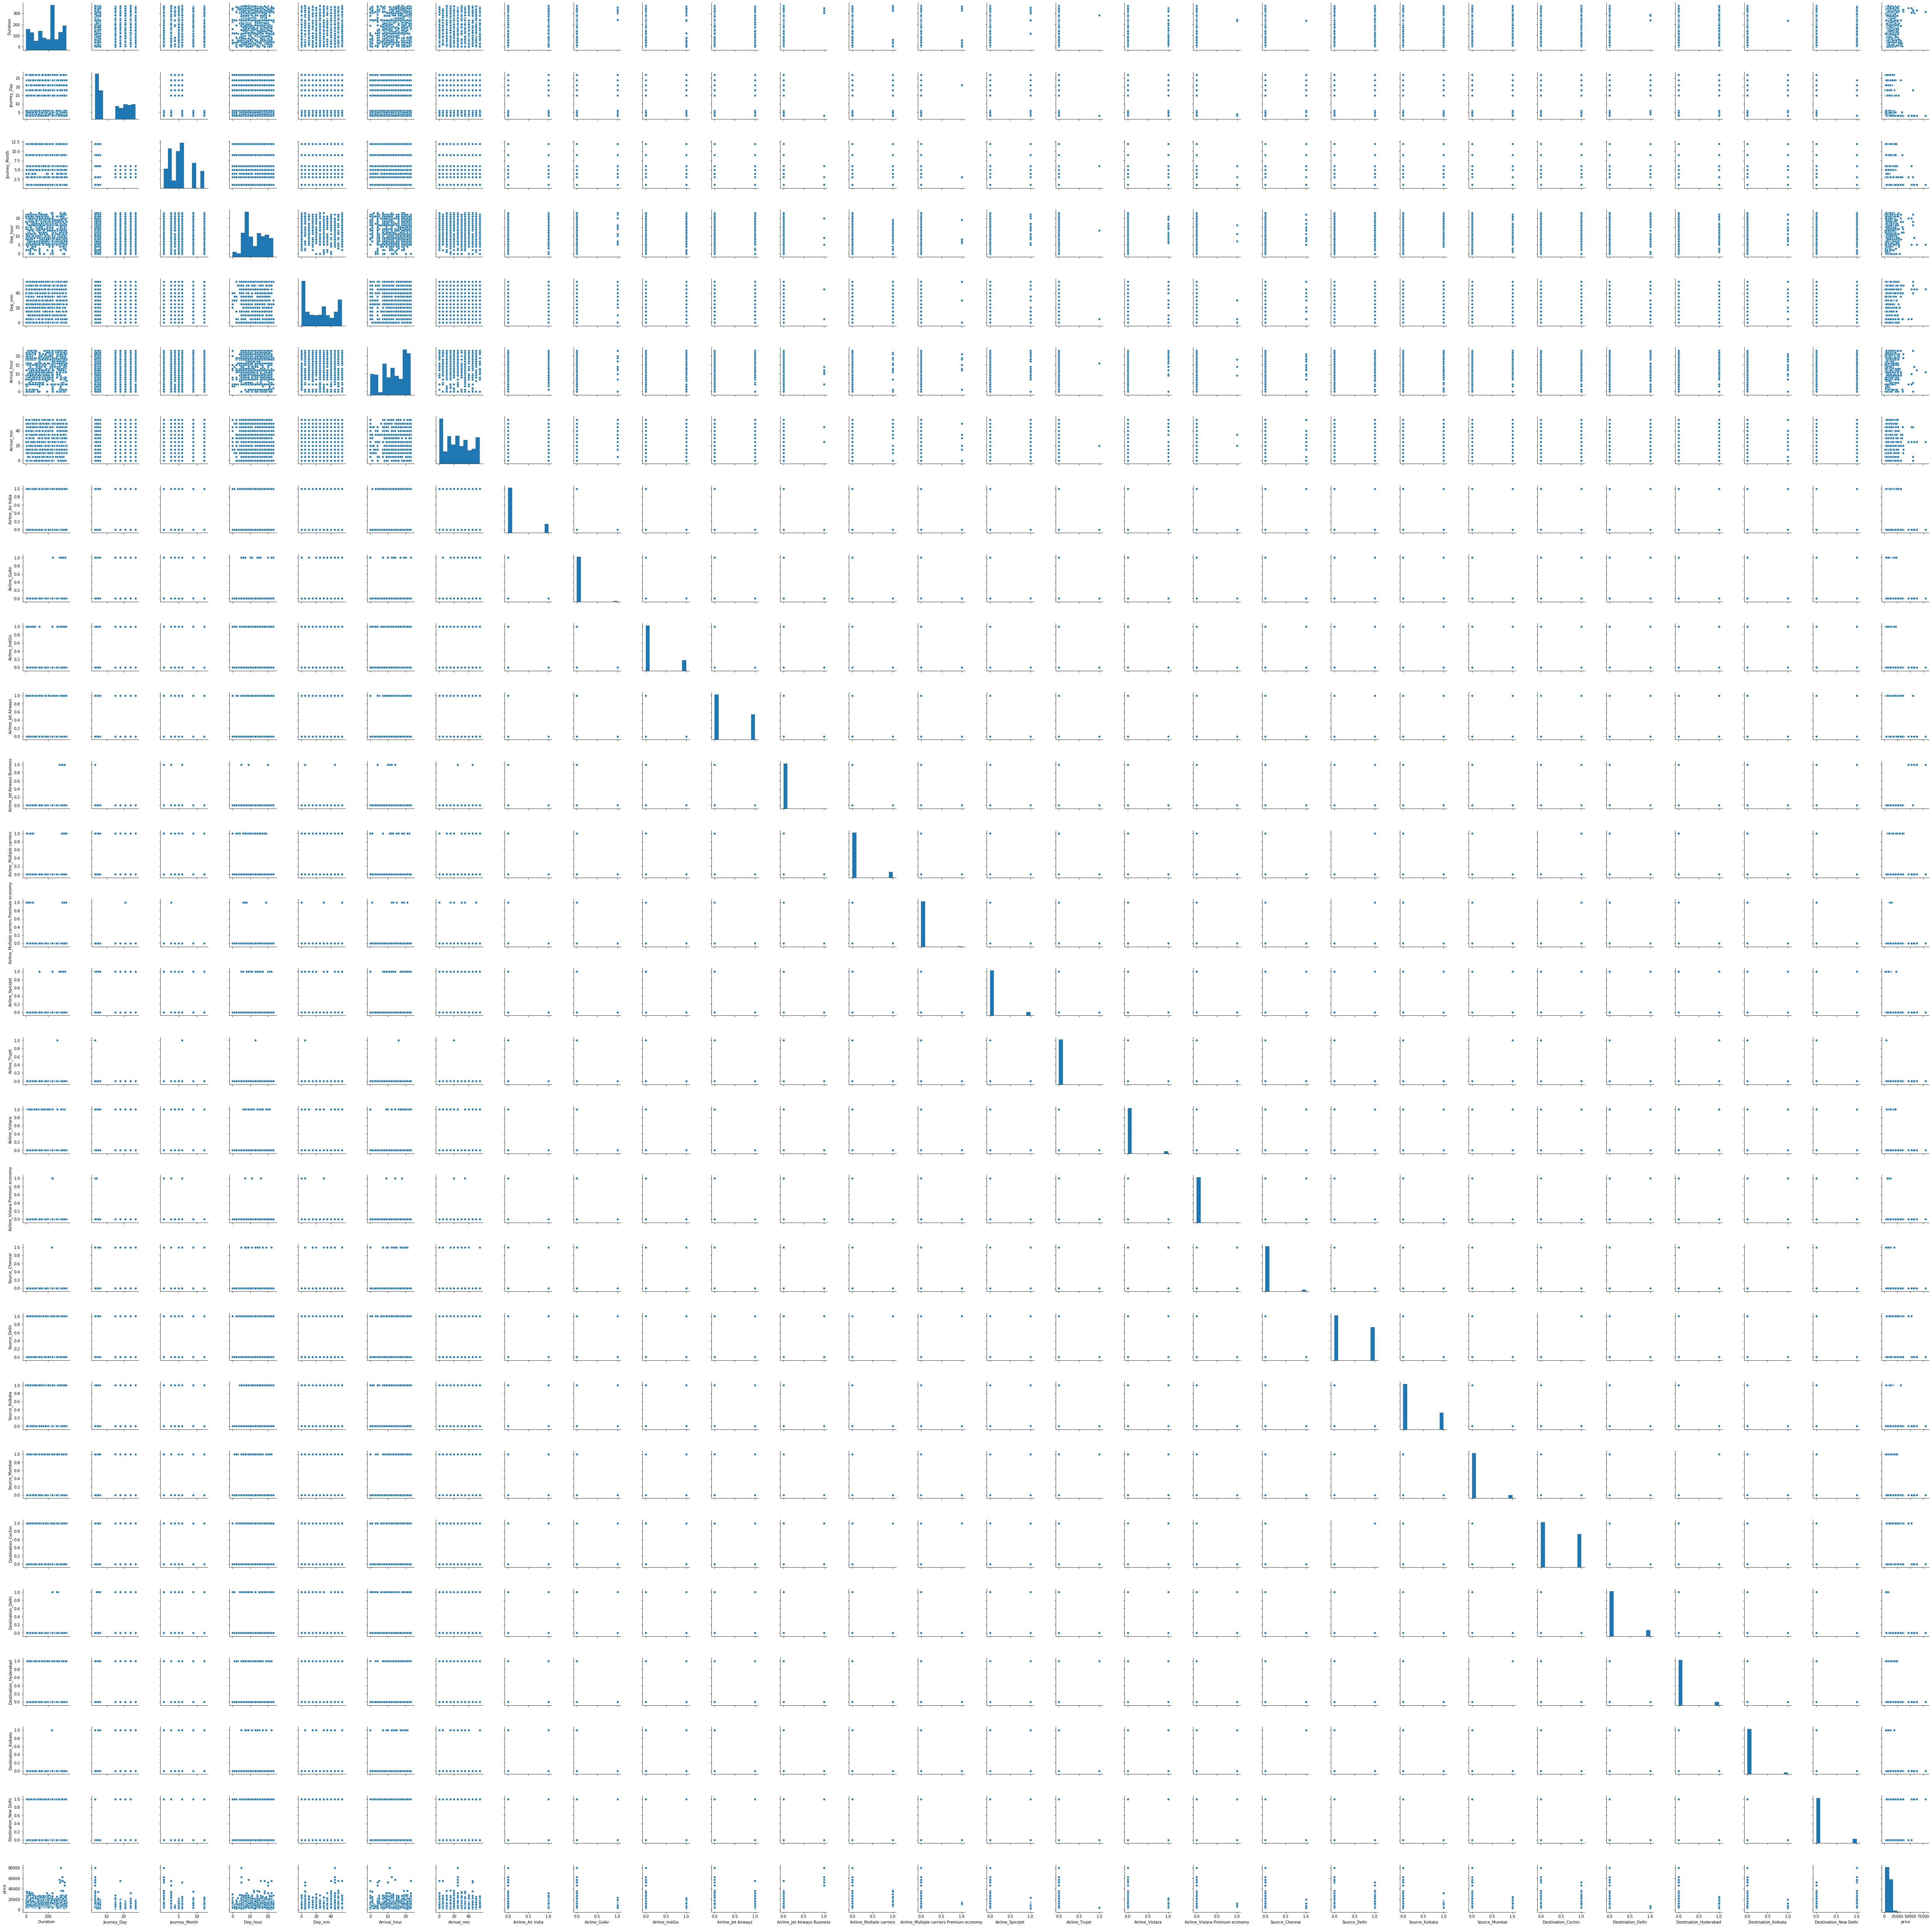

In [63]:
sns.pairplot(data_train)

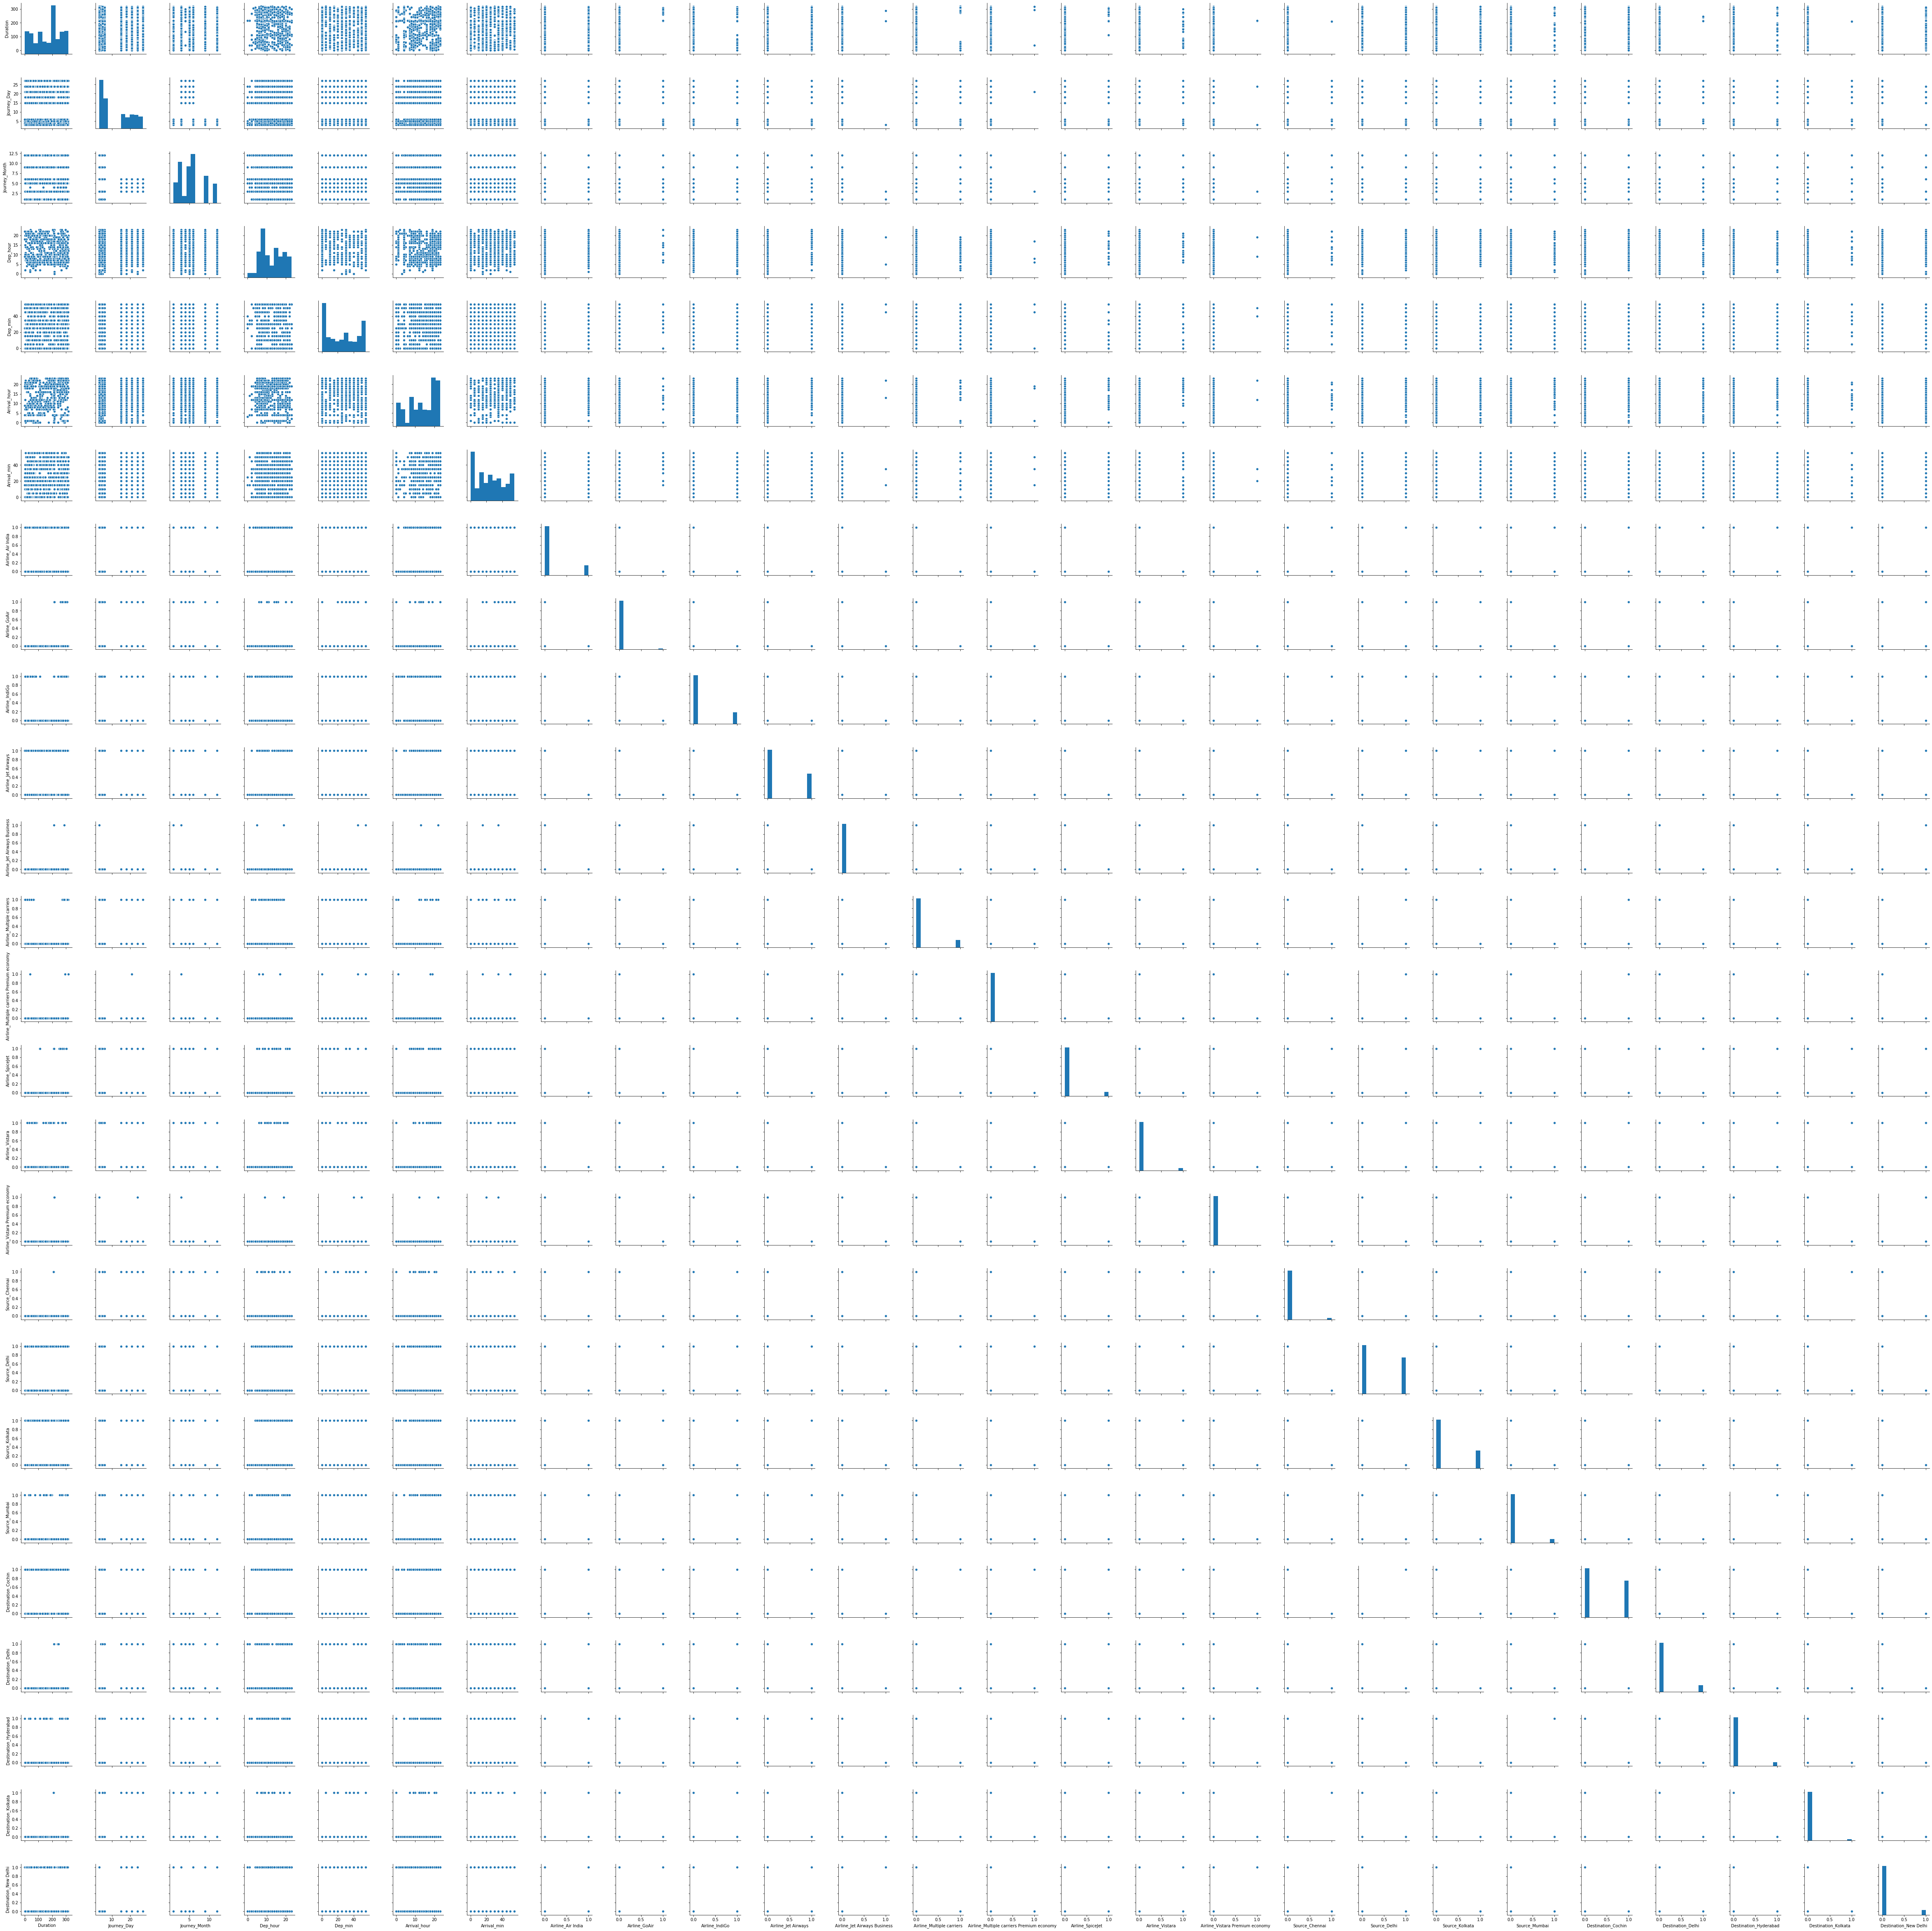

In [64]:
sns.pairplot(data_test)

# Removing the outliers from the training and testing datasets

In [65]:
print("train data shape before zscore", data_train.shape)
from scipy.stats import zscore
z=np.abs(zscore(data_train))
data_train=data_train[(z<3).all(axis=1)]
print("train data shape after zscore", data_train.shape)

train data shape before zscore (10682, 28)
train data shape after zscore (7588, 28)


In [66]:
print("test data shape before zscore", data_test.shape)
from scipy.stats import zscore
z=np.abs(zscore(data_test))
data_test=data_test[(z<3).all(axis=1)]
print("test data shape after zscore", data_test.shape)

test data shape before zscore (2671, 26)
test data shape after zscore (1905, 26)


In [67]:
data_train.skew()

Duration                                    -0.160218
Journey_Day                                  0.363867
Journey_Month                                0.568031
Dep_hour                                     0.069788
Dep_min                                      0.244282
Arrival_hour                                -0.417903
Arrival_min                                  0.184772
Airline_Air India                            1.657887
Airline_GoAir                                0.000000
Airline_IndiGo                               1.501945
Airline_Jet Airways                          0.310536
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    1.893317
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Trujet                               0.000000
Airline_Vistara                              0.000000
Airline_Vistara Premium economy              0.000000
Source_Chennai              

In [68]:
data_test.skew()

Duration                                    -0.226403
Journey_Day                                  0.497506
Journey_Month                                0.518061
Dep_hour                                     0.095086
Dep_min                                      0.228710
Arrival_hour                                -0.475190
Arrival_min                                  0.195207
Airline_Air India                            1.675996
Airline_GoAir                                0.000000
Airline_IndiGo                               1.448822
Airline_Jet Airways                          0.458092
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    1.648306
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Vistara                              0.000000
Airline_Vistara Premium economy              0.000000
Source_Chennai                               0.000000
Source_Delhi                

Separating the test and train data in the same first as we do not want to use skewness on the target data which will alter the output variable.

In [69]:
x=data_train.iloc[:,0:-1]
y=pd.DataFrame(data_train.iloc[:,-1])
x.head()


,Duration,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
1,336,5,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,106,6,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,311,5,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,341,27,5,11,25,19,15,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10,38,6,1,9,45,23,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [70]:
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [71]:
for i in data_test.columns:
    if data_test.skew()[i]>0.55:
        data_test[i]=np.sqrt(data_test[i])

In [72]:
x.skew()

Duration                                    -0.160218
Journey_Day                                  0.363867
Journey_Month                               -0.170675
Dep_hour                                     0.069788
Dep_min                                      0.244282
Arrival_hour                                -0.417903
Arrival_min                                  0.184772
Airline_Air India                            1.657887
Airline_GoAir                                0.000000
Airline_IndiGo                               1.501945
Airline_Jet Airways                          0.310536
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    1.893317
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Trujet                               0.000000
Airline_Vistara                              0.000000
Airline_Vistara Premium economy              0.000000
Source_Chennai              

In [73]:
data_test.skew()

Duration                                    -0.226403
Journey_Day                                  0.497506
Journey_Month                                0.518061
Dep_hour                                     0.095086
Dep_min                                      0.228710
Arrival_hour                                -0.475190
Arrival_min                                  0.195207
Airline_Air India                            1.675996
Airline_GoAir                                0.000000
Airline_IndiGo                               1.448822
Airline_Jet Airways                          0.458092
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    1.648306
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Vistara                              0.000000
Airline_Vistara Premium economy              0.000000
Source_Chennai                               0.000000
Source_Delhi                

Scaling the data

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [75]:
data_test=pd.DataFrame(scaler.fit_transform(data_test))
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-1.570418,-0.725605,0.092324,0.816368,0.353947,-1.337866,0.108776,-0.466938,0.0,-0.510641,1.254721,0.0,-0.471934,0.0,0.0,0.0,0.0,0.0,0.860997,-0.668184,0.0,0.860997,-0.364116,0.0,0.0,0.0
1,0.799511,-0.841928,2.110030,-1.173511,-0.177811,-0.500280,-0.187674,-0.466938,0.0,1.958322,-0.796990,0.0,-0.471934,0.0,0.0,0.0,0.0,0.0,-1.161444,1.496595,0.0,-1.161444,-0.364116,0.0,0.0,0.0
2,-0.196258,1.019254,-0.243961,1.178164,-0.443690,0.756099,-1.373478,-0.466938,0.0,-0.510641,1.254721,0.0,-0.471934,0.0,0.0,0.0,0.0,0.0,0.860997,-0.668184,0.0,0.860997,-0.364116,0.0,0.0,0.0
3,-1.311518,1.019254,-0.243961,-0.811715,-1.241328,1.035295,-1.373478,-0.466938,0.0,-0.510641,-0.796990,0.0,2.118942,0.0,0.0,0.0,0.0,0.0,0.860997,-0.668184,0.0,0.860997,-0.364116,0.0,0.0,0.0
4,0.480865,1.368225,0.092324,1.901757,1.683343,-1.617062,1.294580,-0.466938,0.0,-0.510641,-0.796990,0.0,-0.471934,0.0,0.0,0.0,0.0,0.0,-1.161444,-0.668184,0.0,-1.161444,2.746380,0.0,0.0,0.0


In [76]:
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,1.240980,-0.907241,-2.040323,-1.337189,1.467253,-0.066281,-0.500983,2.127577,0.0,-0.499671,-0.856740,0.0,-0.430412,0.0,0.0,0.0,0.0,0.0,0.0,-1.143278,1.487458,0.0,-1.143278,-0.373053,0.0,0.0,0.0
1,-0.735979,-0.793656,1.096505,-0.631867,0.106321,-1.352579,0.097625,-0.470018,0.0,-0.499671,1.167215,0.0,-0.430412,0.0,0.0,0.0,0.0,0.0,0.0,0.874678,-0.672288,0.0,0.874678,-0.373053,0.0,0.0,0.0
2,1.026093,-0.907241,1.824408,0.955108,-0.982425,1.362938,0.396929,-0.470018,0.0,2.001319,-0.856740,0.0,-0.430412,0.0,0.0,0.0,0.0,0.0,0.0,-1.143278,1.487458,0.0,-1.143278,-0.373053,0.0,0.0,0.0
3,1.283958,1.591624,-0.101657,-0.279206,0.106321,0.791250,-0.500983,-0.470018,0.0,-0.499671,-0.856740,0.0,2.323355,0.0,0.0,0.0,0.0,0.0,0.0,0.874678,-0.672288,0.0,0.874678,-0.373053,0.0,0.0,0.0
4,-1.320472,-0.793656,-2.040323,-0.631867,1.195067,1.362938,-1.398895,2.127577,0.0,-0.499671,-0.856740,0.0,-0.430412,0.0,0.0,0.0,0.0,0.0,0.0,0.874678,-0.672288,0.0,0.874678,-0.373053,0.0,0.0,0.0


# use the x and y data to split into training and testing

In [77]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(train_x,train_y)
        pred=regr.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score at", r_state ,"is", r2score)
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r2_score)
    return final_r_state

In [78]:
#Let use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

The r2 score at 42 is 0.46768000137591004
The r2 score at 43 is 0.49388345738401684
The r2 score at 44 is 0.4947947142554878
The r2 score at 45 is 0.4866899418674646
The r2 score at 46 is 0.5342897343117077
The r2 score at 47 is 0.5043811454413056
The r2 score at 48 is 0.5214740905785684
The r2 score at 49 is 0.5072072786434842
The r2 score at 50 is 0.503892985053416
The r2 score at 51 is 0.4801966574548032
The r2 score at 52 is 0.4997033885070351
The r2 score at 53 is 0.48892715978006296
The r2 score at 54 is 0.4815874758955514
The r2 score at 55 is 0.5033054682449034
The r2 score at 56 is 0.4988957333074133
The r2 score at 57 is 0.4990948349480485
The r2 score at 58 is 0.48292119782117815
The r2 score at 59 is 0.4713243022184943
The r2 score at 60 is 0.509241815559966
The r2 score at 61 is 0.5111622867535063
The r2 score at 62 is 0.5207380315802062
The r2 score at 63 is 0.5064448021272974
The r2 score at 64 is 0.49097502027121687
The r2 score at 65 is 0.4940575862930504
The r2 score 

In [79]:
#Finalising the train and test data based on the above scores
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=0.20)

In [80]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6070, 27)
(6070, 1)
(1518, 27)
(1518, 1)


In [81]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [82]:
#Checking gridsearch for different algorithms
sr=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sr,parameters)
gdsr.fit(x_train,y_train)
gdsr.best_params_

{'C': 10, 'kernel': 'linear'}

In [83]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(knn,parameters)
gdk.fit(x_train,y_train)
gdk.best_params_

{'n_neighbors': 10}

In [84]:
# checking the model and its metrics by running a set of codes.
score=[]
cv=[]
MSE=[]
RMSE=[]
MAE=[]
    
from sklearn.preprocessing import LabelBinarizer

algorithm=[LinearRegression(),SVR(C= 10, kernel= 'linear'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=10)]
for i in algorithm:
    l=i
    print(l)
    l.fit(x_train,y_train)
    pred=l.predict(x_test)
    r2score=r2_score(y_test,pred)
    print("R2 score", r2score)
    score.append(r2score)
    crossscore=cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    print("The CV Score is", crossscore)
    cv.append(crossscore)
    mean_sqrd_error=mean_squared_error(y_test,pred)
    MSE.append(mean_sqrd_error)
    print("Mean Squared Error is", mean_sqrd_error )
    rootMSE=np.sqrt(mean_sqrd_error)
    RMSE.append(rootMSE)
    print("Root Mean Squared Error is: ",rootMSE)
    Meanabserror=mean_absolute_error(y_test,pred)
    MAE.append(Meanabserror)
    print("Mean Absolute Error is: ", Meanabserror)
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.5392080910996064
The CV Score is 0.5016404692143828
Mean Squared Error is 6446252.152943504
Root Mean Squared Error is:  2538.9470559551855
Mean Absolute Error is:  2045.4651829474096


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 score 0.5205557829502245
The CV Score is 0.4831928594260285
Mean Squared Error is 6707188.769326908
Root Mean Squared Error is:  2589.824080768211
Mean Absolute Error is:  2035.9396391419007


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_stat

In [85]:
result=pd.DataFrame({'Model':['LinearRegression','SVR','DecisionTreeRegressor','KNeighborsRegressor'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':MSE, 'Root Mean Squared Error': RMSE, 'Mean Absolute Error':MAE})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.539208,0.501640,6.446252e+06,2538.947056,2045.465183
1,SVR,0.520556,0.483193,6.707189e+06,2589.824081,2035.939639
2,DecisionTreeRegressor,0.615356,0.620078,5.380984e+06,2319.694904,1511.259991
3,KNeighborsRegressor,0.666209,0.636258,4.669573e+06,2160.919369,1650.764756


In [86]:
#Since the models are not giving better scores, we can try Lasso 
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [87]:
#Lets check max r2 score when to use
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

The r2 score at 42 is 0.4679490776015849
The r2 score at 43 is 0.49387812960636035
The r2 score at 44 is 0.4954129674930188
The r2 score at 45 is 0.48656173495691835
The r2 score at 46 is 0.5337834525084293
The r2 score at 47 is 0.5044219467167064
The r2 score at 48 is 0.5209562102922518
The r2 score at 49 is 0.5072132580067803
The r2 score at 50 is 0.5038632683337909
The r2 score at 51 is 0.4800010085365516
The r2 score at 52 is 0.4997902982434499
The r2 score at 53 is 0.4887010165070368
The r2 score at 54 is 0.48141090105619966
The r2 score at 55 is 0.502935283618178
The r2 score at 56 is 0.4996353961768214
The r2 score at 57 is 0.4993023490906062
The r2 score at 58 is 0.48402538319874544
The r2 score at 59 is 0.4710722582895611
The r2 score at 60 is 0.5110787386621745
The r2 score at 61 is 0.5112007821523402
The r2 score at 62 is 0.5221240113605334
The r2 score at 63 is 0.5063521850549324
The r2 score at 64 is 0.49067173336613357
The r2 score at 65 is 0.4937904319370984
The r2 score

In [88]:
#Lets use cross val score with Lasso
print("Mean r2 score for Lasso Regression:", cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Lasso Regression: ", cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
#The lasso here is performing just like Linear Regression

Mean r2 score for Lasso Regression: 0.5016184557068906
standard deviation in r2 score for Lasso Regression:  0.007856663320146258


In [89]:
#Now we will have to use gradient boosting technique
#for getting best parameters we need to use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [90]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print("Mean r2 score for Gradient boosting Regression:", cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Gradient boosting Regression: ", cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient boosting Regression: 0.6931762180850283
standard deviation in r2 score for Gradient boosting Regression:  0.009781684981334813


In [91]:
#Now we will have to use Adaboost Regression Algorithm 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lreg,lsreg,dt]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 1000}

In [92]:
# Lets check the maximum r2 score corresponding to this
r_state=maxr2_score(ada_reg,x,y)

The r2 score at 42 is 0.4919944660693788
The r2 score at 43 is 0.5127413671457346
The r2 score at 44 is 0.5106779927141153
The r2 score at 45 is 0.5214460293556071
The r2 score at 46 is 0.5196274007408185
The r2 score at 47 is 0.5051897243767891
The r2 score at 48 is 0.5293741035280961
The r2 score at 49 is 0.4844605440185573
The r2 score at 50 is 0.5274476897830893
The r2 score at 51 is 0.47493620260280744
The r2 score at 52 is 0.5287163392473058
The r2 score at 53 is 0.4885019382362149
The r2 score at 54 is 0.5171280010885329
The r2 score at 55 is 0.5263227828779977
The r2 score at 56 is 0.46464549406252975
The r2 score at 57 is 0.5091244449029827
The r2 score at 58 is 0.4900553816532104
The r2 score at 59 is 0.46663742805095154
The r2 score at 60 is 0.48088784193949863
The r2 score at 61 is 0.49381260066314303
The r2 score at 62 is 0.5517431371636632
The r2 score at 63 is 0.485882851478879
The r2 score at 64 is 0.49524286228282655
The r2 score at 65 is 0.5009215385570734
The r2 scor

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maxr2_score(rf,x,y)

The r2 score at 42 is 0.7216556908440436
The r2 score at 43 is 0.7117779099884595
The r2 score at 44 is 0.7395627092813458
The r2 score at 45 is 0.7542469572546794
The r2 score at 46 is 0.7331919999016092
The r2 score at 47 is 0.7367621013845862
The r2 score at 48 is 0.7478403654933432
The r2 score at 49 is 0.7543417593808575
The r2 score at 50 is 0.7396689520556956
The r2 score at 51 is 0.7277995241796171
The r2 score at 52 is 0.7393712431713851
The r2 score at 53 is 0.7232821814801851
The r2 score at 54 is 0.7336916420197177
The r2 score at 55 is 0.7372567549315217
The r2 score at 56 is 0.7309905487168549
The r2 score at 57 is 0.7486814752427132
The r2 score at 58 is 0.7477277286517032
The r2 score at 59 is 0.7274190752687938
The r2 score at 60 is 0.7677334972640274
The r2 score at 61 is 0.7452646796355136
The r2 score at 62 is 0.7539962389992511
The r2 score at 63 is 0.7621813375317577
The r2 score at 64 is 0.7610209515748647
The r2 score at 65 is 0.7414206469536853
The r2 score at 

After trying all above models RandomForestRegressor show best accuracy among all.. So lets finalize this model

In [94]:
rf=RandomForestRegressor(n_estimators=200,random_state=60)

In [95]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=60, verbose=0, warm_start=False)

In [96]:
rf.score(x_train,y_train)

0.9289085981738777

In [97]:
rf.score(x_test,y_test)

0.753069155308346

In [98]:
pred=rf.predict(x_test)

In [99]:
pred

array([ 9725.66      , 13693.82125   , 12959.1695    , ...,
       10331.39416667,  7280.845     ,  4818.21      ])

In [100]:
print("RMSE is :",np.sqrt(mean_squared_error(y_test,pred)))
print("r2 score is :",r2_score(y_test,pred))

RMSE is : 1858.612670200751
r2 score is : 0.753069155308346


In [101]:
# Saving The Model
from sklearn.externals import joblib
joblib.dump(rf,"Flight_ticket_prediction.pkl")

['Flight_ticket_prediction.pkl']